# Data Analytics & EDA: Warehouse Inventory Data

This notebook performs comprehensive exploratory data analysis on the provided datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Configs
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
%matplotlib inline

## 1. Load Data

In [2]:
# Define paths
DATA_DIR = 'data/'

# Load CSVs
train_df = pd.read_csv(f"{DATA_DIR}train.csv", parse_dates=['date'])
test_df = pd.read_csv(f"{DATA_DIR}test.csv", parse_dates=['date'])
expiry_df = pd.read_csv(f"{DATA_DIR}expiry_mapping.csv")

print(f"Train Shape: {train_df.shape}")
print(f"Test Shape: {test_df.shape}")
print(f"Expiry Shape: {expiry_df.shape}")

Train Shape: (913000, 4)
Test Shape: (45000, 4)
Expiry Shape: (50, 2)


## 2. Basic Data Inspection

In [3]:
display(train_df.head())
print(train_df.info())
display(train_df.describe())

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB
None


,date,store,item,sales
count,913000,913000.000000,913000.000000,913000.000000
mean,2015-07-02 11:59:59.999999744,5.500000,25.500000,52.250287
min,2013-01-01 00:00:00,1.000000,1.000000,0.000000
25%,2014-04-02 00:00:00,3.000000,13.000000,30.000000
50%,2015-07-02 12:00:00,5.500000,25.500000,47.000000
75%,2016-10-01 00:00:00,8.000000,38.000000,70.000000
max,2017-12-31 00:00:00,10.000000,50.000000,231.000000
std,NaN,2.872283,14.430878,28.801144


## 3. Univariate Analysis: Sales

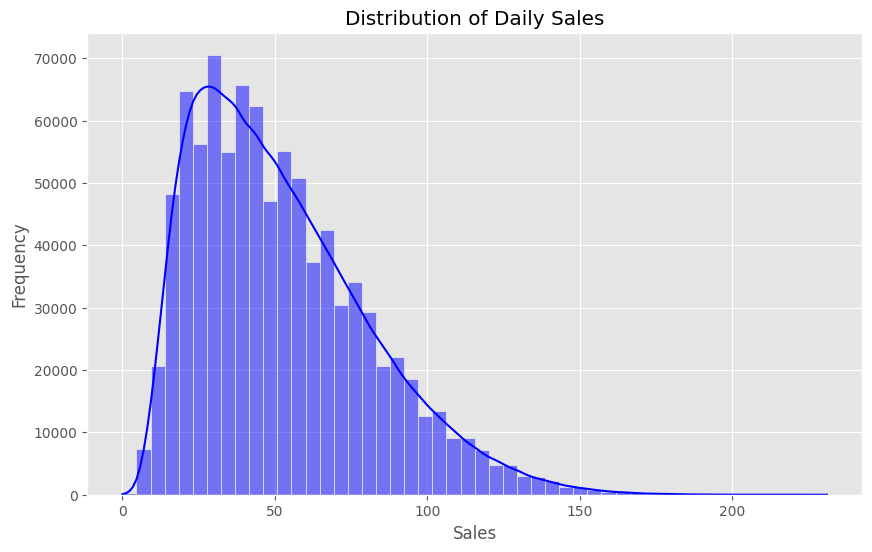

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['sales'], bins=50, kde=True, color='blue')
plt.title('Distribution of Daily Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

## 4. Time Series Analysis

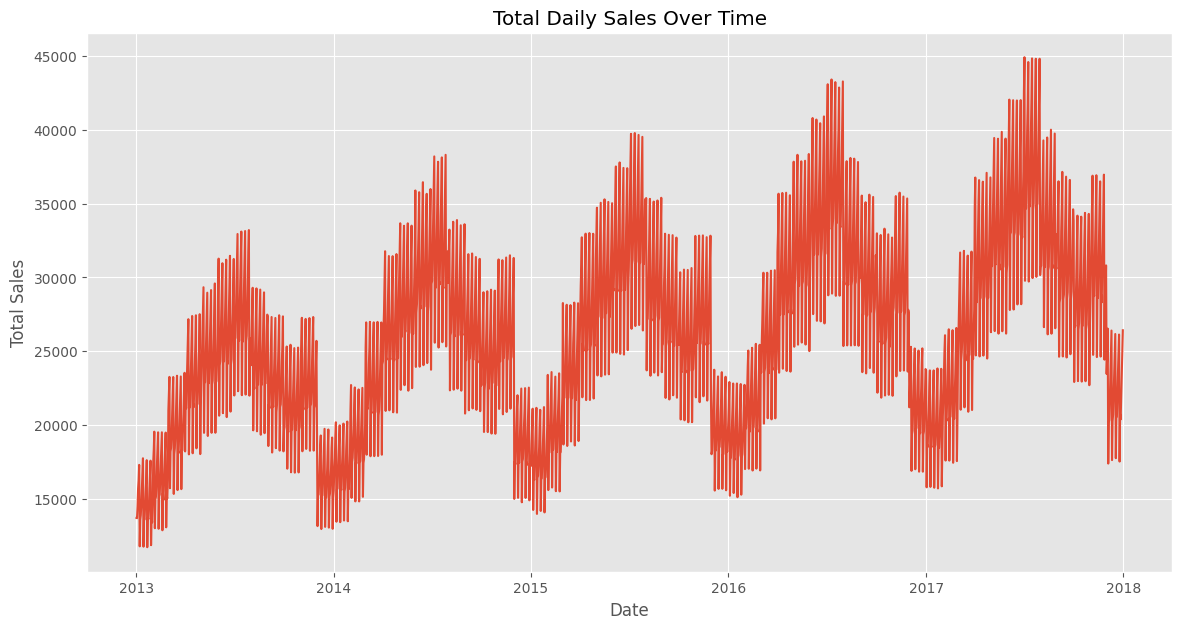

In [5]:
# Sales over Time (Aggregated across all stores/items)
daily_sales = train_df.groupby('date')['sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(daily_sales['date'], daily_sales['sales'])
plt.title('Total Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

## 5. Seasonality Analysis

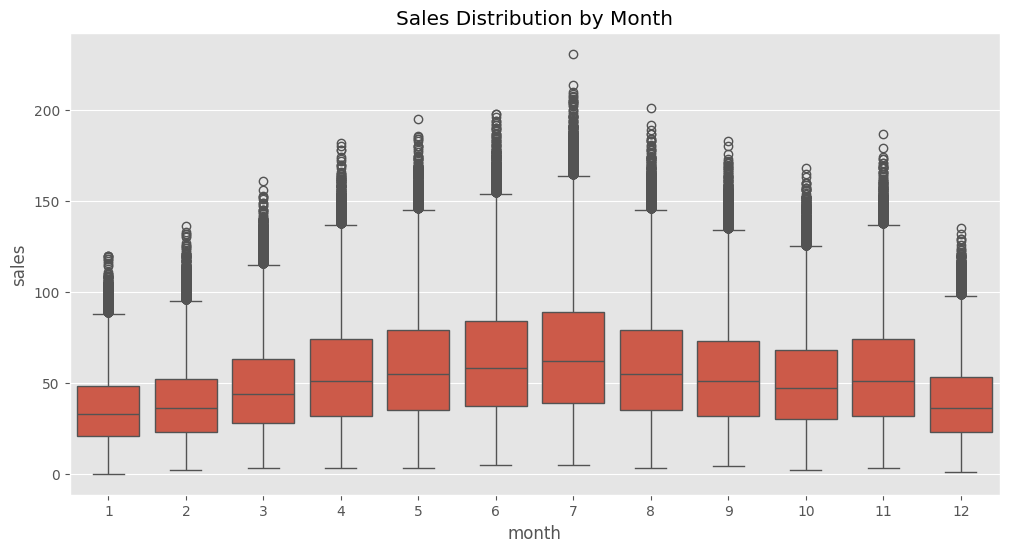

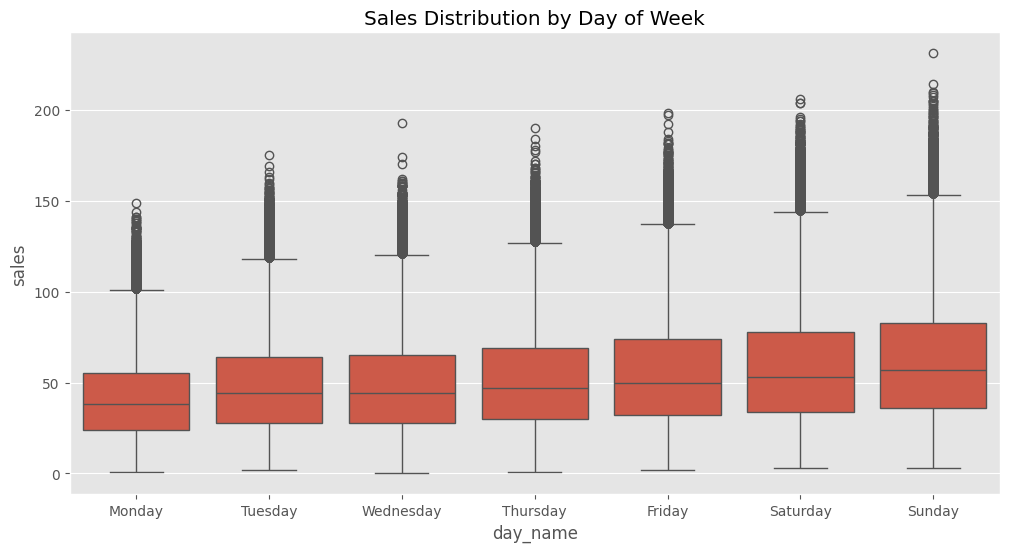

In [6]:
# Feature Engineering for Plotting
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day_of_week'] = train_df['date'].dt.dayofweek
train_df['day_name'] = train_df['date'].dt.day_name()

# Monthly Seasonality
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='sales', data=train_df)
plt.title('Sales Distribution by Month')
plt.show()

# Weekly Seasonality
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_name', y='sales', data=train_df, order=order_days)
plt.title('Sales Distribution by Day of Week')
plt.show()

## 6. Store & Item Analysis

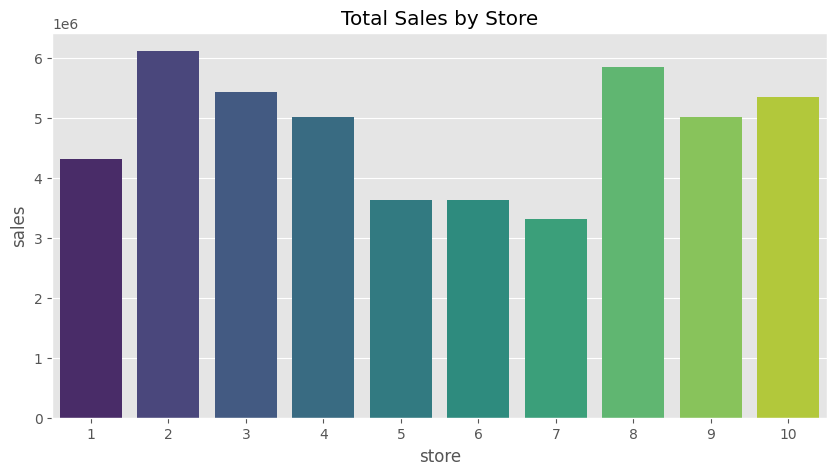

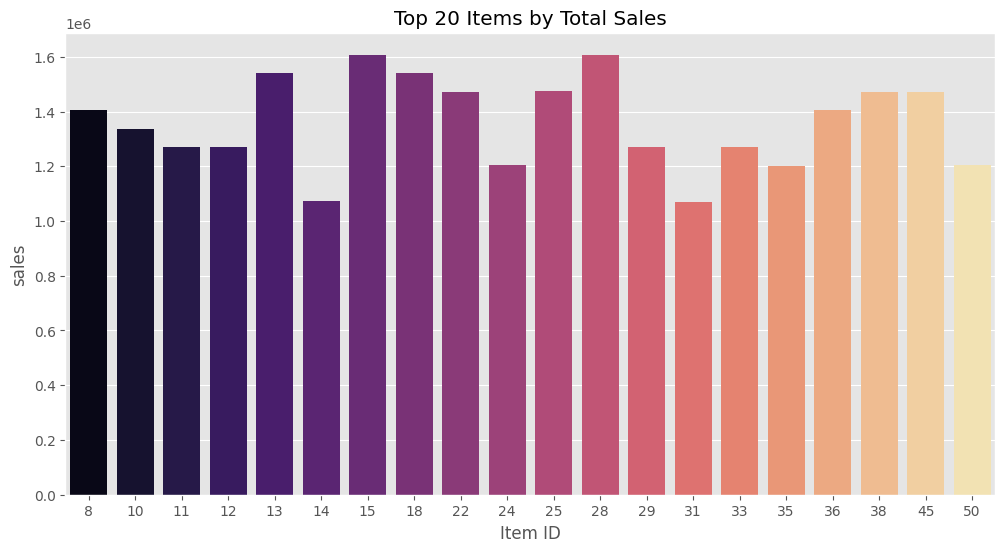

In [7]:
# Total Sales by Store
store_sales = train_df.groupby('store')['sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='store', y='sales', data=store_sales, palette='viridis')
plt.title('Total Sales by Store')
plt.show()

# Total Sales by Item
item_sales = train_df.groupby('item')['sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='item', y='sales', data=item_sales.head(20), palette='magma') # Top 20 items
plt.title('Top 20 Items by Total Sales')
plt.xlabel('Item ID')
plt.show()

## 7. Expiry & Shelf Life Analysis

,item_id,expiry_days
0,1,120
1,2,120
2,3,60
3,4,120
4,5,45


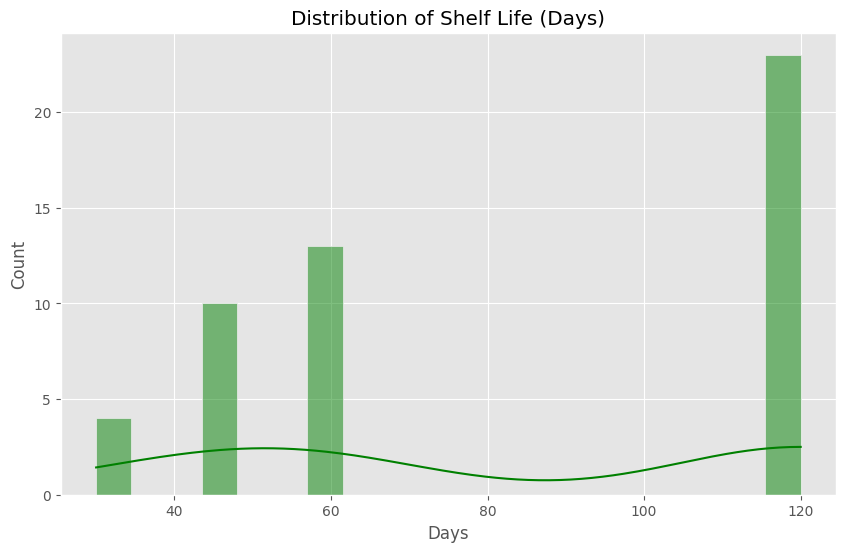

In [8]:
# Merge Shelf Life Data
expiry_df = expiry_df.rename(columns={'item': 'item_id'}) # Ensure loose match if column names differ
# Actually, let's check column compatibility:
# data/expiry_mapping.csv usually has 'item' or 'item_id'
# Let's re-read to be sure or just display it first.
display(expiry_df.head())

plt.figure(figsize=(10, 6))
sns.histplot(expiry_df['expiry_days'], bins=20, kde=True, color='green')
plt.title('Distribution of Shelf Life (Days)')
plt.xlabel('Days')
plt.show()

## 8. Correlation Analysis

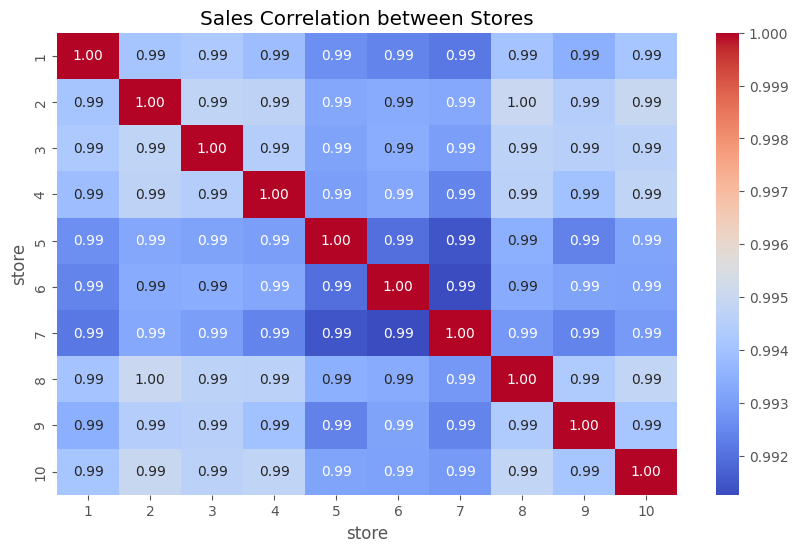

In [11]:
# Pivot table to check correlation between stores (Do stores sell similarly?)
pivot_sales = train_df.pivot_table(index='date', columns='store', values='sales', aggfunc='sum')
corr_matrix = pivot_sales.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sales Correlation between Stores')
plt.show()